In [14]:
import pandas as pd
import pickle
import json
import seaborn as sns
import pprint
import json
import glob
import os
import numpy as np
from ast import literal_eval
pp = pprint.PrettyPrinter(depth=6)
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 120)

In [15]:
import git
git = git.Git("../../../sonarqube/") 

In [16]:
szz_folder = "../../szz"
csv_folder = "../../csv"

### Import issues

In [17]:
issues = pd.read_csv(f"{csv_folder}/issues.csv", index_col=0)
for date_field in ["created", "duedate", "lastViewed", "resolutiondate", "updated"]:
    issues[date_field] = pd.to_datetime(issues[date_field], errors="coerce")
issues = issues[issues.created > '2015-03-17 15:04:32+0000']
issues.head()

/Library/Python/3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (4,6,9,12,13,17,19,22,41,42,43,60,61,82,84,89) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,issue_key,issue_id,issuetype,customfield_12130,customfield_11041,customfield_12132,customfield_12131,project,customfield_12134,customfield_12530,fixVersions,customfield_12133,customfield_12136,customfield_12532,resolution,customfield_10431,customfield_12135,customfield_12531,customfield_12138,customfield_10432,customfield_12534,customfield_12137,customfield_10433,customfield_12533,customfield_11832,customfield_11831,customfield_11833,resolutiondate,workratio,lastViewed,watches,created,customfield_11032,customfield_11033,priority,edition,customfield_11233,customfield_11036,customfield_11830,labels,customfield_11631,customfield_11038,customfield_10930,customfield_11347,customfield_10931,customfield_10932,versions,issuelinks,assignee,updated,status,components,customfield_12031,customfield_11140,customfield_12030,customfield_12033,customfield_11141,description,customfield_12032,customfield_12034,customfield_12430,customfield_11344,customfield_11343,customfield_10530,customfield_11345,customfield_10730,customfield_11337,customfield_11930,customfield_11139,customfield_11338,summary,creator,subtasks,customfield_11130,customfield_11131,reporter,customfield_11132,customfield_11133,customfield_10243,customfield_11335,customfield_11334,customfield_11730,customfield_10434,customfield_12536,customfield_12535,customfield_12139,environment,customfield_12538,customfield_10437,customfield_12537,customfield_10438,duedate,votes,issuetype_id,issuetype_name,priority_id,priority_name,assignee_key,assignee_name,reporter_key,reporter_name,creator_key,creator_name,status_id,status_name,resolution_id,resolution_name,votes_votes
0,SONAR-13913,97898,Task,P3-Medium,0|i0dkhb:,No root cause identified,NaN,SONAR,Not captured yet,NaN,[],Not assessed yet,Not captured yet,NaN,NaN,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,NaT,-1,NaT,<JIRA Watchers at 5060633888>,2020-09-29 08:54:53+00:00,NaN,NaN,Major,Community,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],NaN,2020-09-29 08:54:53+00:00,Open,"[<JIRA Component: name='Database', id='11077'>]",NaN,NaN,NaN,NaN,NaN,- Remove org.sonar.server.platform.BackendClea...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Remove table clean up used in Integration Tests,Julien Lancelot,[],NaN,NaN,Julien Lancelot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],NaT,0,3,Task,3,Major,NaN,NaN,julien.lancelot,julien.lancelot,julien.lancelot,julien.lancelot,1,Open,NaN,NaN,0
1,SONAR-13912,97868,Task,P3-Medium,0|i0dkav:,No root cause identified,NaN,SONAR,Not captured yet,NaN,[],Not assessed yet,Not captured yet,NaN,NaN,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,NaT,-1,NaT,<JIRA Watchers at 5061570768>,2020-09-28 10:14:16+00:00,NaN,NaN,Major,Community,NaN,NaN,NaN,['trello:5f71b7467b498d57987bfe0a'],None,NaN,NaN,NaN,NaN,NaN,[],[<JIRA IssueLink: id='53803'>],Malena Ebert,2020-09-28 10:18:24+00:00,Open,[],NaN,NaN,NaN,NaN,NaN,The goal of this task is to detect vulnerabili...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Add OWASP Dependency Check task to Cirrus CI,Malena Ebert,[],NaN,NaN,Malena Ebert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],NaT,0,3,Task,3,Major,malena.ebert,malena.ebert,malena.ebert,malena.ebert,malena.ebert,malena.ebert,1,Open,NaN,NaN,0
2,SONAR-13910,97864,Improvement,P3-Medium,0|i0dka7:,No root cause identified,NaN,SONAR,Not captured yet,NaN,"[<JIRA Version: name='8.5', id='16342'>]",Not assessed yet,Not captured yet,NaN,NaN,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,NaT,-1,NaT,<JIRA Watchers at 5061573984>,2020-09-28 09:56:03+00:00,NaN,NaN,Major,Developer,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],Julien Lancelot,2020-09-28 19:33:18+00:00,In Review,[],NaN,NaN,NaN,NaN,NaN,The changes are:\r\n * faster analysis for pro...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,C/C++/Objective-C analysis updates,Evgeny Mandrikov,[],NaN,NaN,Evgeny Mandrikov,NaN,NaN,Na

### Import fixversions

In [18]:
fixversions = pd.read_csv(f"{csv_folder}/issues_fixversions.csv", index_col=0)
fixversions.head(5)

,issue_id,fixVersion_name,fixVersion_id
0,97864,8.5,16342
1,97858,8.5,16342
2,97855,8.5,16342
3,97786,8.6,16435
4,97773,8.5,16342


### Import versions

In [19]:
versions = pd.read_csv(f"{csv_folder}/issues_versions.csv", index_col=0)
versions.head(5)

,issue_id,version_name,version_id
0,97777,8.4.2,16404
1,97773,8.4.2,16404
2,97525,8.4.2,16404
3,97521,8.4,15833
4,97347,8.4.2,16404


### Import tags

In [20]:
tags = pd.read_csv(f"{csv_folder}/tags.csv", index_col=0)
tags.Date = pd.to_datetime(tags.Date)
tags["month"] = tags.Date.dt.month
tags["year"] = tags.Date.dt.year
tags

,Tag,Sha,Date,Tag_number,month,year
0,latest-silver-master-#65,639ab0ae52d143cf8b8b82c009c95e69ed2d40d7,2015-01-30 10:12:28,latest-silver-master-#65,1,2015
1,8.4.2.36762,2de1f343e3dbd9e88007b42e475512677c04eb8a,2020-08-27 14:11:31,8.4.2.36762,8,2020
2,8.4.1.35646,a0d372f704998d38856c26e28662fd7de062f873,2020-07-14 08:13:18,8.4.1.35646,7,2020
3,8.4.0.35506,74b4533439f380827d68e8c01667eeaecad89fc7,2020-07-03 07:09:27,8.4.0.35506,7,2020
4,8.3.1.34397,b77ce511a2039330aea8832ad12e86a8cfa9ff7d,2020-05-07 12:09:22,8.3.1.34397,5,2020
...,...,...,...,...,...,...
181,2.10,43f27118331e8395365562c3859986489e38fb0a,2011-08-18 10:56:47,2.10,8,2011
182,2.9,d0d00d0874464b462e07dca0755ad662538395f2,2011-07-17 20:34:06,2.9,7,2011
183,2.8,9b97642bcdbf8060544ab96396da3600dc701e19,2011-05-18 18:30:23,2.8,5,2011
184,2.7,a823384d188516cb00088b6dd7d4ca66a21f5c77,2011-03-31 17:17:07,2.7,3,2011


## Szz Unleashed - Bug issues with Affected Version
* python3 fetch_jira_bugs/fetch.py --issue-code SONAR --jira-project jira.sonarsource.com
* python3 fetch_jira_bugs/git_log_to_array.py --repo-path ../sonarqube --from-commit b326bfd875b0b41
* python3 fetch_jira_bugs/find_bug_fixes.py --gitlog gitlog.json --issue-list issue/ --gitlog-pattern "SONAR-{nbr}"
* java -jar build/libs/szz_find_bug_introducers-0.1.jar -i ../issue_list.json -r ../../sonarqube/

In [21]:
working_folder = "compare_parameters_unleashed/default"

In [22]:
szz_files = glob.glob(f"{szz_folder}/{working_folder}/issues/*.json")
szz_files

['../../szz/compare_parameters_unleashed/default/issues/fix_and_introducers_pairs_4.json',
 '../../szz/compare_parameters_unleashed/default/issues/fix_and_introducers_pairs_5.json',
 '../../szz/compare_parameters_unleashed/default/issues/fix_and_introducers_pairs_2.json',
 '../../szz/compare_parameters_unleashed/default/issues/fix_and_introducers_pairs_3.json',
 '../../szz/compare_parameters_unleashed/default/issues/fix_and_introducers_pairs_0.json',
 '../../szz/compare_parameters_unleashed/default/issues/fix_and_introducers_pairs_1.json',
 '../../szz/compare_parameters_unleashed/default/issues/fix_and_introducers_pairs_6.json',
 '../../szz/compare_parameters_unleashed/default/issues/fix_and_introducers_pairs_7.json']

### Bug fixing commits

In [23]:
data = {}
for szz_file in szz_files:
    with open(szz_file, "r") as f:
        data.update(json.load(f))

In [24]:
fields =[ 'creationdate',
 'resolutiondate',
 'commitdate',
 'hash']

In [25]:
tuples = []
for key in data.keys():
    inner_tuple = []
    inner_tuple.append(key)
    for field in fields:
        inner_tuple.append(data[key][field])
    tuples.append(tuple(inner_tuple))
issues_fixing_commit = pd.DataFrame(tuples, columns=["issue_name"]+fields)
issues_fixing_commit

,issue_name,creationdate,resolutiondate,commitdate,hash
0,SONAR-7084,2015-11-26 16:37:15 +0100,2016-05-17 16:42:24 +0200,2015-11-30 16:51:26 +0100,f463897daea037addd0ee5d1a45c046b784e1fc5
1,SONAR-7083,2015-11-26 15:22:13 +0100,2015-11-30 14:01:03 +0100,2015-11-30 11:48:51 +0100,06310fbb1aff7750fa55a4eebd6fc8eada97f95a
2,SONAR-9782,2017-09-01 17:05:07 +0200,2017-10-17 11:33:22 +0200,2017-10-16 10:33:00 +0200,87f55940473777bd4080595a8369a7cf958745c4
3,SONAR-11468,2018-11-12 08:43:21 +0100,2018-12-04 16:05:26 +0100,2018-12-04 16:04:32 +0100,4ecd4bdcbc24f97a2d77aafb6273ce805976baaf
4,SONAR-10258,2018-01-08 16:51:50 +0100,2018-01-10 09:05:57 +0100,2018-01-08 17:52:43 +0100,0b8e4aad2693dbea56400bacd43fd8a4aec72389
...,...,...,...,...,...
500,SONAR-6715,2015-07-15 08:29:57 +0200,2015-07-22 09:54:57 +0200,2015-07-22 11:53:35 +0200,1ef10758eb1c939a60e159758de2603b87ec859d
501,SONAR-6831,2015-09-03 12:09:33 +0200,2015-09-22 15:43:52 +0200,2015-09-28 11:16:29 +0200,d5302c2e5cf81f2794294ae49c1996538b38e8d4
502,SONAR-6995,2015-11-04 15:23:53 +0100,2015-12-04 11:30:34 +0100,2015-12-03 12:29:24 +0100,e5f5ca562f10727eead9e0de8fe1a090dea8399d
503,SONAR-6632,2015-06-09 21:51:26 +0200,2016-05-16 14:41:20 +0200,2016-05-16 12:12:25 +0200,23ee784e6d44f8462c8d160c7a113a64424bfb67


### Bug inducing commits

In [76]:
fix_and_introducers = pd.read_csv(f"{csv_folder}/fix_and_introducers_default.csv", index_col=0)
fix_and_introducers['all_affected_tags_fixing'] = fix_and_introducers['all_affected_tags_fixing'].apply(lambda x: literal_eval(x))
fix_and_introducers['all_affected_tags_inducing'] = fix_and_introducers['all_affected_tags_inducing'].apply(lambda x: literal_eval(x))
fix_and_introducers["tags_affected_only_inducing"] = fix_and_introducers.apply(\
                                                                               lambda row: list(set(row.all_affected_tags_inducing)\
                                                                               .difference(set(row.all_affected_tags_fixing))),axis=1)
fix_and_introducers

,fixing_commit,inducing_commit,all_affected_tags_fixing,all_affected_tags_inducing,first_fixing_tag,first_inducing_tag,tags_affected_only_inducing
0,100653f76e52f1555ce9424924031acdeb941888,950454051f247863735b75d251bee8460c7e07be,"[7.5, 7.6, 7.7, 7.8, 7.9, 7.9.1, 7.9.2, 7.9.3,...","[5.5, 5.5-M11, 5.5-M12, 5.5-M13, 5.5-M14, 5.5-...",7.5,5.5,"[6.7, 6.7.7, 5.6-RC2, 6.5-M3, 5.6-RC1, 6.4-RC1..."
1,100653f76e52f1555ce9424924031acdeb941888,6bc55b17ebd87802cb9b55d5b6625e1a935f3909,"[7.5, 7.6, 7.7, 7.8, 7.9, 7.9.1, 7.9.2, 7.9.3,...","[5.5, 5.5-M11, 5.5-M12, 5.5-M13, 5.5-M14, 5.5-...",7.5,5.5,"[6.7, 6.7.7, 5.6-RC2, 6.5-M3, 5.6-RC1, 6.4-RC1..."
2,100653f76e52f1555ce9424924031acdeb941888,5b947f0d78f4a63b916b10e626d29398830e5da3,"[7.5, 7.6, 7.7, 7.8, 7.9, 7.9.1, 7.9.2, 7.9.3,...","[7.5, 7.6, 7.7, 7.8, 7.9, 7.9.1, 7.9.2, 7.9.3,...",7.5,7.5,[]
6,34fece43c543cd2d3cd8e76a9af188f12cf69c39,fb218304c322c3e055d8450690f6ae3b2aad45cc,"[6.7, 6.7-RC1, 6.7.1, 6.7.2, 6.7.3, 6.7.4, 6.7...","[6.0, 6.0-RC1, 6.0-RC2, 6.1, 6.1-RC1, 6.1-RC2,...",6.7,6.0,"[6.3.1, 6.3.0.18587, 6.5-M3, 6.4-RC1, 6.2.1, 6..."
7,34fece43c543cd2d3cd8e76a9af188f12cf69c39,f6a1da456075b5307537c9f736eecb656c5d3a2d,"[6.7, 6.7-RC1, 6.7.1, 6.7.2, 6.7.3, 6.7.4, 6.7...","[3.0, 3.0.1, 3.1, 3.1.1, 3.2, 3.2.1, 3.3, 3.3....",6.7,3.0,"[3.7, 5.6-RC2, 6.5-M3, 6.4-RC1, 4.3.2, 3.1.1, ..."
...,...,...,...,...,...,...,...
14938,7a230c2fa98532eb79d2efcd30c31d608f9fa108,fe716c6dc43d4d7acb437136b1c87902e8ff0bc4,"[6.7, 6.7-RC1, 6.7.1, 6.7.2, 6.7.3, 6.7.4, 6.7...","[6.4, 6.4-RC1, 6.4-RC2, 6.4-RC3, 6.5, 6.5-M1, ...",6.7,6.4,"[6.5-M2, 6.6, 6.5, 6.5-M3, 6.5-M4, 6.4-RC1, 6...."
14939,7a230c2fa98532eb79d2efcd30c31d608f9fa108,90306cb436e4fadceda6c106adc407618674f0d0,"[6.7, 6.7-RC1, 6.7.1, 6.7.2, 6.7.3, 6.7.4, 6.7...","[6.6, 6.6-RC1, 6.7, 6.7-RC1, 6.7.1, 6.7.2, 6.7...",6.7,6.6,"[6.6-RC1, 6.6]"
14940,7a230c2fa98532eb79d2efcd30c31d608f9fa108,a76cf43f5fa4ae6c609fda4186a8fcad0a8e1bfa,"[6.7, 6.7-RC1, 6.7.1, 6.7.2, 6.7.3, 6.7.4, 6.7...","[5.2, 5.2-RC1, 5.2-RC2, 5.2-RC3, 5.3, 5.3-RC1,...",6.7,5.2,"[5.6-RC2, 6.5-M3, 6.4-RC1, 6.5-M1, 5.4-RC4, 5...."
14942,7a230c2fa98532eb79d2efcd30c31d608f9fa108,5fac9ad9ac653dba89f5f53457c8d17959cef7cc,"[6.7, 6.7-RC1, 6.7.1, 6.7.2, 6.7.3, 6.7.4, 6.7...","[6.1, 6.1-RC1, 6.1-RC2, 6.1.1, 6.2, 6.2-RC1, 6...",6.7,6.1,"[6.3.1, 6.3.0.18587, 6.5-M3, 6.4-RC1, 6.2.1, 6..."


## Analysis

**Distribution of number of inducing commits per bug**

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='inducing_commit'>

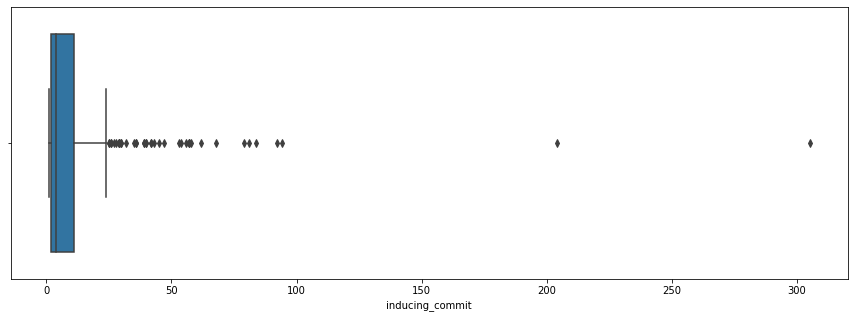

In [27]:
sns.boxplot(fix_and_introducers.groupby("fixing_commit").inducing_commit.count())

**Percentage of bugs for which we have inducing commits out of the ones with a fixing commits**

In [28]:
len(set(issues_fixing_commit.hash).intersection(set(fix_and_introducers.fixing_commit))) / len(issues_fixing_commit.hash)

0.8950495049504951

In [ ]:
def find_first_tag_contains_commit(commit):
    tags = git.tag("--contains", commit).split("\n")
    if len(tags) > 0:
        return tags[0]
    return None

def all_tag_contains_commit(commit):
    tags = git.tag("--contains", commit).split("\n")
    return tags

def find_all_tags_for_df(df, newColumn, func, field):
    cache = {}
    df[newColumn] = np.nan
    for i, row in df.iterrows():
        if(not row[field] in cache):
            cache[row[field]] = func(row[field])
        else:
            row[newColumn] = cache[row[field]]
        if(i%100 == 0):
            print(i)
            print(cache)

from pandarallel import pandarallel
pandarallel.initialize()
#fix_and_introducers["all_affected_tags_fixing"] = fix_and_introducers.fixing_commit.parallel_apply(lambda sha: all_tag_contains_commit(sha))
#fix_and_introducers["all_affected_tags_inducing"] = fix_and_introducers.inducing_commit.apply(lambda sha: all_tag_contains_commit(sha))

fix_and_introducers["first_fixing_tag"] = fix_and_introducers.all_affected_tags_fixing.apply(lambda tags: tags[0])
fix_and_introducers["first_inducing_tag"] = fix_and_introducers.all_affected_tags_inducing.apply(lambda tags: tags[0])

In [30]:
fix_and_introducers.isna().sum()

fixing_commit                  0
inducing_commit                0
all_affected_tags_fixing       0
all_affected_tags_inducing     0
first_fixing_tag              30
first_inducing_tag             0
dtype: int64

In [50]:
fix_and_introducers[fix_and_introducers.first_fixing_tag.isna()].fixing_commit.unique()

array(['7c6f52df2e18da76180d74b3533e709f5b47309a'], dtype=object)

We were able to find a first tag containing the commit for both inducing and fixing commits except for:
* Fixing commit 7c6f52df2e18da76180d74b3533e709f5b47309a

### Merging all datasets

In [32]:
versions = versions.merge(issues[["issue_key", "issue_id"]])
versions

,issue_id,version_name,version_id,issue_key
0,97777,8.4.2,16404,SONAR-13902
1,97773,8.4.2,16404,SONAR-13900
2,97525,8.4.2,16404,SONAR-13875
3,97521,8.4,15833,SONAR-13874
4,97347,8.4.2,16404,SONAR-13855
...,...,...,...,...
1002,29731,4.5.1,11621,SONAR-6348
1003,27612,5.1,11627,SONAR-6346
1004,27863,5.1,11627,SONAR-6340
1005,27851,4.5,11620,SONAR-6336


/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='version_name', ylabel='count'>

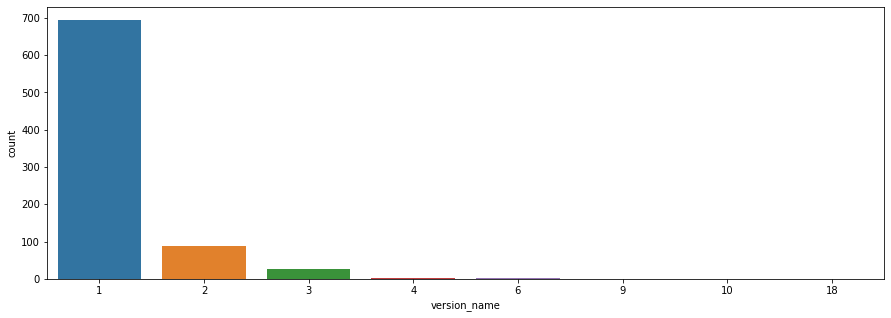

In [36]:
sns.countplot(versions.groupby("issue_id").version_name.count())

In [43]:
versions_list = versions.groupby(["issue_id", "issue_key"]).version_name.apply(list).reset_index()
versions_list = versions_list.rename(columns={"version_name":"versions"})
versions_list

,issue_id,issue_key,versions
0,27612,SONAR-6346,[5.1]
1,27851,SONAR-6336,[4.5]
2,27863,SONAR-6340,[5.1]
3,29665,SONAR-6351,[5.1]
4,29688,SONAR-6374,[5.1]
...,...,...,...
811,97347,SONAR-13855,[8.4.2]
812,97521,SONAR-13874,[8.4]
813,97525,SONAR-13875,[8.4.2]
814,97773,SONAR-13900,[8.4.2]


In [77]:
merge = versions_list.merge(issues_fixing_commit, left_on="issue_key", right_on="issue_name")
inducing_and_versions = fix_and_introducers[fix_and_introducers.index.isin(fix_and_introducers[["inducing_commit", "first_inducing_tag"]].drop_duplicates().index)]
merge = merge.merge(inducing_and_versions[["fixing_commit", "inducing_commit", "tags_affected_only_inducing", "all_affected_tags_inducing", "first_inducing_tag"]], left_on="hash", right_on="fixing_commit")
merge

,issue_id,issue_key,versions,issue_name,creationdate,resolutiondate,commitdate,hash,fixing_commit,inducing_commit,tags_affected_only_inducing,all_affected_tags_inducing,first_inducing_tag
0,29665,SONAR-6351,[5.1],SONAR-6351,2015-03-30 07:14:00 +0200,2015-07-15 13:05:36 +0200,2015-07-15 15:01:21 +0200,05087385ee6a3e032febe5f5f3033aa13a534147,05087385ee6a3e032febe5f5f3033aa13a534147,2ccd693c8ccefb423ab10368ac93fff2eccc1b1f,"[5.1, 5.1-RC1, latest-silver-master-#65, 5.1-R...","[5.1, 5.1-RC1, 5.1-RC2, 5.1.1, 5.1.2, 5.2, 5.2...",5.1
1,40116,SONAR-6685,[5.1],SONAR-6685,2015-07-01 07:27:06 +0200,2015-07-15 13:05:48 +0200,2015-07-15 15:01:21 +0200,05087385ee6a3e032febe5f5f3033aa13a534147,05087385ee6a3e032febe5f5f3033aa13a534147,2ccd693c8ccefb423ab10368ac93fff2eccc1b1f,"[5.1, 5.1-RC1, latest-silver-master-#65, 5.1-R...","[5.1, 5.1-RC1, 5.1-RC2, 5.1.1, 5.1.2, 5.2, 5.2...",5.1
2,29701,SONAR-6335,[5.0],SONAR-6335,2015-03-24 06:21:51 +0100,2015-03-24 09:00:46 +0100,2015-03-24 12:34:43 +0100,9ea5ee4ea61f0311c4f1fa5d2cfa96896be9676c,9ea5ee4ea61f0311c4f1fa5d2cfa96896be9676c,8ed0d04c7dddd824b86f25cec4d6761f88078317,"[5.1-RC1, latest-silver-master-#65, 5.0-RC1, 5...","[5.0, 5.0-RC1, 5.0-RC2, 5.0-RC3, 5.0-RC4, 5.0....",5.0
3,29701,SONAR-6335,[5.0],SONAR-6335,2015-03-24 06:21:51 +0100,2015-03-24 09:00:46 +0100,2015-03-24 12:34:43 +0100,9ea5ee4ea61f0311c4f1fa5d2cfa96896be9676c,9ea5ee4ea61f0311c4f1fa5d2cfa96896be9676c,8660e4806c513c4bbafd0cb43b8d5b612203c16c,"[5.1-RC1, latest-silver-master-#65, 5.0-RC1, 5...","[5.0, 5.0-RC1, 5.0-RC2, 5.0-RC3, 5.0-RC4, 5.0....",5.0
4,29701,SONAR-6335,[5.0],SONAR-6335,2015-03-24 06:21:51 +0100,2015-03-24 09:00:46 +0100,2015-03-24 12:34:43 +0100,9ea5ee4ea61f0311c4f1fa5d2cfa96896be9676c,9ea5ee4ea61f0311c4f1fa5d2cfa96896be9676c,cb7d179fd72ab475f91a251cd9461a07df117909,"[5.1-RC1, latest-silver-master-#65, 5.0-RC1, 5...","[5.0, 5.0-RC1, 5.0-RC2, 5.0-RC3, 5.0-RC4, 5.0....",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,96934,SONAR-13802,[8.4.1],SONAR-13802,2020-08-25 09:34:30 +0200,2020-08-26 15:01:13 +0200,2020-08-26 10:16:58 +0200,2e95a6d9729ad591ef16c950453529a704d534db,2e95a6d9729ad591ef16c950453529a704d534db,7925b2f67b87f0d3d6086a3b006e276341f70566,"[8.4.2.36762, 8.4.1.35646, 8.4.0.35506]","[8.4.0.35506, 8.4.1.35646, 8.4.2.36762, 8.5.0....",8.4.0.35506
2860,96934,SONAR-13802,[8.4.1],SONAR-13802,2020-08-25 09:34:30 +0200,2020-08-26 15:01:13 +0200,2020-08-26 10:16:58 +0200,2e95a6d9729ad591ef16c950453529a704d534db,2e95a6d9729ad591ef16c950453529a704d534db,f097b5009865233532dfebaee182d1bb405c33c2,"[8.4.0.35506, 7.9, 7.9.3, 7.9.2, 8.4.2.36762, ...","[7.8, 7.9, 7.9.1, 7.9.2, 7.9.3, 7.9.4, 8.0, 8....",7.8
2861,97773,SONAR-13900,[8.4.2],SONAR-13900,2020-09-23 11:30:41 +0200,2020-09-28 13:15:55 +0200,2020-09-25 13:43:24 +0200,1055024bf5bbfd50b26e4be8dc5a1fc52990dfed,1055024bf5bbfd50b26e4be8dc5a1fc52990dfed,b054a6785bb85a4f8f4f5beca70b1e4d43ce7cec,"[8.4.0.35506, 8.4.2.36762, 8.3.0.34182, 8.3.1....","[8.2.0.32929, 8.3.0.34182, 8.3.1.34397, 8.4.0....",8.2.0.32929
2862,97773,SONAR-13900,[8.4.2],SONAR-13900,2020-09-23 11:30:41 +0200,2020-09-28 13:15:55 +0200,2020-09-25 13:43:24 +0200,1055024bf5bbfd50b26e4be8dc5a1fc52990dfed,1055024bf5bbfd50b26e4be8dc5a1fc52990dfed,1fba92e6a849ab29a6d0889dfa56bbc60b5f275c,"[8.4.0.35506, 8.4.2.36762, 8.3.0.34182, 8.3.1....","[8.2.0.32929, 8.3.0.34182, 8.3.1.34397, 8.4.0....",8.2.0.32929


**Uniform versions from Jira to Github**

In [130]:
map_versions = {"8.5.0.37579": "8.5",
               "8.4.0.35506": "8.4",
               "8.3.0.34182": "8.3",
               "8.2.0.32929": "8.2",
               "8.1.0.31237": "8.1",
               "8.4.2.36762": "8.4.2",
               "8.4.1.35646": "8.4.1"}

In [78]:
def replace_versions(tags):
    for i, tag in enumerate(tags):
       if(tag in map_versions):
        tags[i] = map_versions[tag]
    return tags
merge.all_affected_tags_inducing = merge.all_affected_tags_inducing.apply(replace_versions)
merge.tags_affected_only_inducing = merge.tags_affected_only_inducing.apply(replace_versions)

**How many version does an issue have?**

In [79]:
versions_list.versions.apply(lambda x: len(x)).value_counts(normalize=True)

1     0.850490
2     0.109069
3     0.031863
6     0.002451
4     0.002451
18    0.001225
10    0.001225
9     0.001225
Name: versions, dtype: float64

In [80]:
versions_list.versions.apply(lambda x: len(x)).value_counts()

1     694
2      89
3      26
6       2
4       2
18      1
10      1
9       1
Name: versions, dtype: int64

**Confirm the presence of issues with more than 4 fix versions**

In [81]:
versions_list[versions_list.versions.apply(lambda x: len(x))>4]

,issue_id,issue_key,versions
306,54735,SONAR-8421,"[5.5, 5.6, 5.6.1, 5.6.2, 5.6.3, 6.0, 6.1, 6.1...."
693,86491,SONAR-12282,"[7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, ..."
705,86937,SONAR-12341,"[6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7.7, 7.0..."
766,93028,SONAR-13213,"[7.7, 7.8, 7.9, 8.0, 8.1, 8.2]"
787,95717,SONAR-13583,"[7.9, 7.9.1, 7.9.2, 7.9.3, 8.0, 8.1]"


**How many issues have their fixVersion among the predicted ones by SZZ?**

In [82]:
merge["intersection_versions_tags"] = merge.apply(lambda row: len(set(row.versions).intersection(row.tags_affected_only_inducing)), axis=1)

In [83]:
merge.intersection_versions_tags.value_counts(normalize=True).sort_index()

0    0.222416
1    0.675279
2    0.086592
3    0.014316
4    0.000698
8    0.000698
Name: intersection_versions_tags, dtype: float64

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='intersection_versions_tags', ylabel='count'>

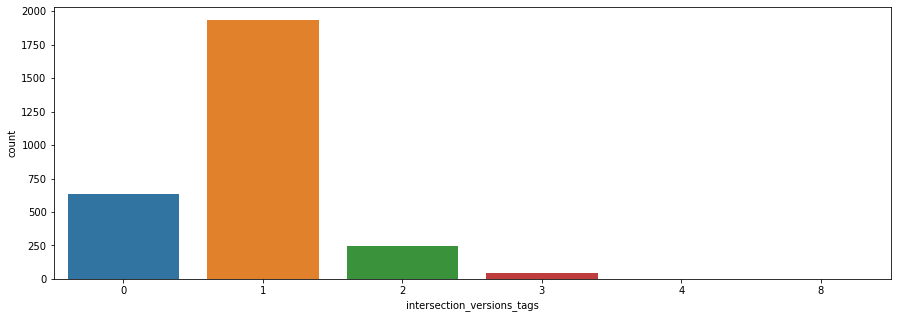

In [84]:
sns.countplot(merge.intersection_versions_tags)

**How many issue have all the affected Versions in the SZZ versions?**

In [85]:
merge["full_intersection"] = merge.apply(lambda row: row.intersection_versions_tags == len(row.versions), axis=1)

In [86]:
merge.full_intersection.value_counts(normalize=True).sort_index()

False    0.27095
True     0.72905
Name: full_intersection, dtype: float64

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='full_intersection', ylabel='count'>

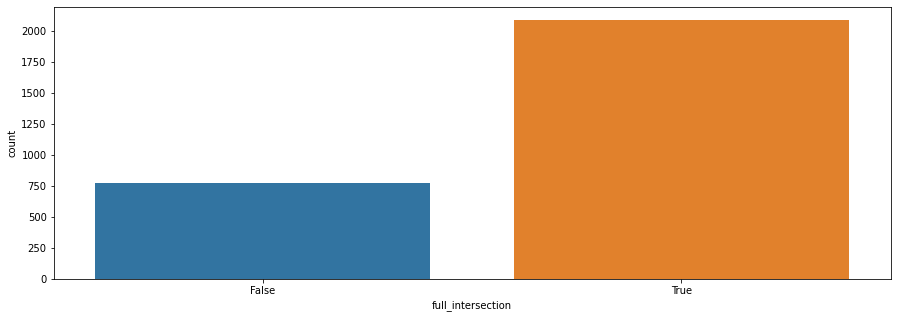

In [87]:
sns.countplot(merge.full_intersection)

**What is the ratio between the intersection and the number of reported versions on Jira?**

In [88]:
merge["intersection_ratio"] = merge.apply(lambda row: row.intersection_versions_tags / len(row.versions), axis=1)

In [89]:
merge.intersection_ratio.value_counts(normalize=True).sort_index()

0.000000    0.222416
0.333333    0.002095
0.500000    0.043645
0.666667    0.002095
0.888889    0.000698
1.000000    0.729050
Name: intersection_ratio, dtype: float64

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='intersection_ratio', ylabel='count'>

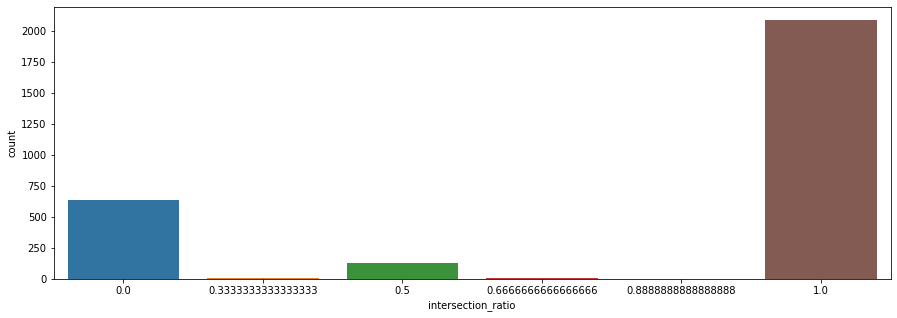

In [115]:
sns.countplot(merge.intersection_ratio)

**What is the ratio between the intersection and the number of identified tags from SZZ?**

In [118]:
merge["szz_prediction_intersection_ratio"] = merge.apply(lambda row: 0 if len(row.tags_affected_only_inducing) == 0 else row.intersection_versions_tags / len(row.tags_affected_only_inducing), axis=1)

In [119]:
merge.szz_prediction_intersection_ratio.value_counts(normalize=True).sort_index()

0.000000    0.222416
0.005917    0.001047
0.005988    0.000349
0.006250    0.000349
0.006369    0.001047
              ...   
0.250000    0.023394
0.333333    0.020950
0.400000    0.000349
0.500000    0.017109
1.000000    0.005237
Name: szz_prediction_intersection_ratio, Length: 190, dtype: float64

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='szz_prediction_intersection_ratio'>

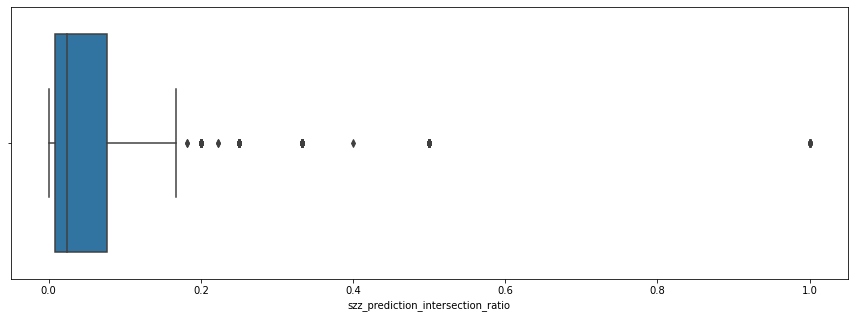

In [157]:
sns.boxplot(merge.szz_prediction_intersection_ratio)

**What is the ratio between the SZZ reported versions and the number of reported versions on Jira?**

In [158]:
merge["szz_jira_version_ratio"] = merge.apply(lambda row: len(row.tags_affected_only_inducing) / len(row.versions), axis=1)

In [161]:
merge.szz_jira_version_ratio.value_counts().sort_index()

0.000000      142
0.666667        2
1.000000       35
1.500000       10
2.000000      105
             ... 
157.000000      3
160.000000      1
165.000000      1
167.000000      1
169.000000      3
Name: szz_jira_version_ratio, Length: 205, dtype: int64

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='szz_jira_version_ratio'>

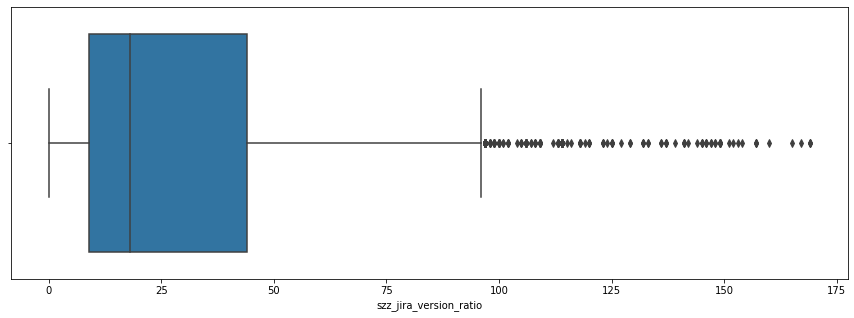

In [160]:
sns.boxplot(merge.szz_jira_version_ratio)

**What is the accuracy of the first inducing tag?**

In [111]:
merge["first_inducing_tag_in_versions"] = merge.apply(lambda row: row.first_inducing_tag in row.versions, axis=1)

In [112]:
merge.first_inducing_tag_in_versions.value_counts(normalize=True).sort_index()

False    0.859986
True     0.140014
Name: first_inducing_tag_in_versions, dtype: float64

### Intersect tags for issues with more inducing_commits

In [146]:
def set_intersection(series):
    ret_val = set()
    for i, l in enumerate(series):
        if i == 0:
            ret_val = set(l)
        else:
            ret_val = ret_val.intersection(set(l))
    return list(ret_val)
merge_inducing_tags = merge.groupby('issue_id').tags_affected_only_inducing.apply(set_intersection).reset_index()
merge_inducing_tags = merge_inducing_tags.rename(columns = {"tags_affected_only_inducing": "intersections_all_inducing_commits"})

In [147]:
merge_inducing_tags.intersections_all_inducing_commits.apply(replace_versions)
merge_inducing_tags = merge_inducing_tags.merge(versions_list, on="issue_id")
merge_inducing_tags

,issue_id,intersections_all_inducing_commits,issue_key,versions
0,29665,"[5.1, 5.1-RC1, latest-silver-master-#65, 5.1-R...",SONAR-6351,[5.1]
1,29701,"[5.1-RC1, latest-silver-master-#65, 5.0-RC1, 5...",SONAR-6335,[5.0]
2,29703,"[5.1, 5.1.2, 5.1-RC2, 5.1.1]",SONAR-6386,"[4.5.4, 5.0]"
3,29731,"[4.5.3, 5.0-RC1, latest-silver-master-#65, 4.5...",SONAR-6348,[4.5.1]
4,29808,[],SONAR-6425,[5.1]
...,...,...,...,...
381,96774,"[8.4, 8.1, 8.3, 8.4.2, 8.2, 8.3.1.34397, 8.0, ...",SONAR-13773,[8.4.1]
382,96862,"[8.4, 8.4.2, 8.4.1]",SONAR-13786,[8.4.1]
383,96887,"[8.4, 8.3, 8.4.2, 8.3.1.34397, 8.4.1]",SONAR-13790,[8.4.1]
384,96934,"[8.4, 8.4.2, 8.4.1]",SONAR-13802,[8.4.1]


In [155]:
merge_inducing_tags["full_intersection"] =\
merge_inducing_tags.apply(\
                          lambda row: \
                          len(set(row.versions).intersection(\
                                                             set(row.intersections_all_inducing_commits))) \
                          / len(row.versions), axis=1)

In [163]:
merge_inducing_tags.full_intersection.value_counts(normalize=True)

1.000000    0.611399
0.000000    0.323834
0.500000    0.046632
0.333333    0.010363
0.666667    0.005181
0.888889    0.002591
Name: full_intersection, dtype: float64

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='full_intersection', ylabel='count'>

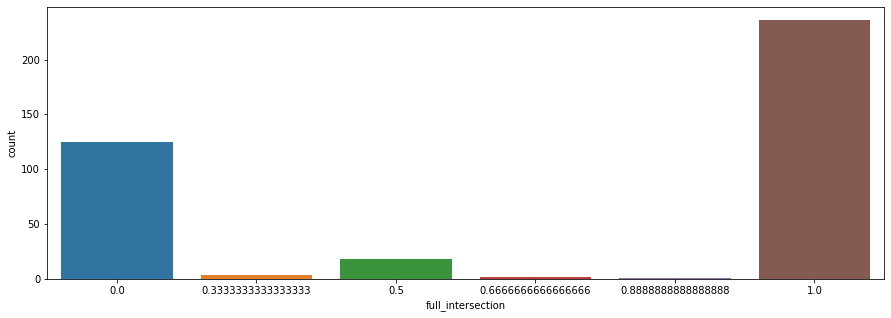

In [156]:
sns.countplot(merge_inducing_tags.full_intersection)

We merged the versions dataset from Jira with the issues dataset and with the SZZ inducing commit dataset. We grouped together the versions so that each issue has a list of affected versions.
For each inducing commit, the list of tags containing it has been retrieved from git (1).
A set difference has been performed between the tags containing the inducing and the fixing commit: we have the tags affected only by the bug with no fix yet (2). By default we are going to use (2) as the evaluation subject.
* 78% of the issues has at least one of the affectedVersions in the ones from SZZ
* 72% of the issues have ALL the affectedVersions in the ones SZZ
* Looking at the ratio of intersected versions / all affectedVersions it seems like if there is a intersection, most of the times all versions intersect: 72% have ratio 1, 22% ratio 0 and the rest is mostly 0.5% as ½ ratio
* Ratio  intersection/szz tags: the boxplot shows a concentration less than 0.1 (10% matches) and few outliers starting from 0.2 -> SZZ over predicts versions. Too many
* How many more versions does SZZ report compared to Jira? Boxplot says median around 20with many outliers above 90
* First inducing tag has an accuracy of 15%

Since each issue can have more than one inducing commit, we intersected the list of tags for each inducing commit per each issue. We investigated the following:
* The ratio full intersection of versions in szz drops to 61% and the 0 match increases to 31%. This technique is therefore not optimal. 
